<strong style="color: #8B4000">univariate analysis: </strong>:
<small>Univariate analysis is a statistical method used to analyze one variable at a time. It involves examining the distribution, central tendency, and dispersion of a single variable. This analysis helps in understanding the characteristics and patterns of the individual variable.</small>

<strong style='color: #8B4000'>Non-graphical: </strong>
<small>Non-graphical analysis refers to the statistical analysis of data without the use of visual aids like graphs or charts. This type of analysis involves using statistical measures to understand and interpret data.</small>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
# removing the duplicate and Nan values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [6]:
#changing datatype of columns
df['id'] = df['id'].astype('str')
df['host_id'] = df['host_id'].astype('str')
df['longitude'] = df['longitude'].astype('str')
df['latitude'] = df['latitude'].astype('str')

df['id'].dtype

dtype('O')

In [7]:
#describe function 
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.nunique()

id                                38821
name                              38253
host_id                           30232
host_name                          9885
neighbourhood_group                   5
neighbourhood                       218
latitude                          17436
longitude                         13639
room_type                             3
price                               581
minimum_nights                       89
number_of_reviews                   393
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

<strong>Categorical Analysis: </strong>
<small>
This type of analysis is used for data that can be divided into groups or categories. It's often used for data that is qualitative in nature. Examples of categorical data include colors (red, blue, green), types of cuisine (Italian, Chinese, Mexican), or yes/no responses. In categorical analysis, you might look at frequencies, proportions, or associations between categories.
</small>

<strong> value_counts(): </strong>  
<small>
* The value_counts() method in pandas is used to get a Series containing counts of unique values in descending order. The resulting object will have an index that is sorted by values in descending order, so that the first element is the most frequently-occurring element. It excludes NA values by default.

* This method is often used with categorical data to understand the distribution of categories. For example, if you have a DataFrame df and a column 'color' with different color names, you can use df['color'].value_counts() to see how many times each color appears in the column.
</small>

In [9]:
df['neighbourhood_group'].value_counts()

Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64

In [10]:
#in percentage format
df['neighbourhood_group'].value_counts(normalize=True)


Manhattan        0.428145
Brooklyn         0.423456
Queens           0.117771
Bronx            0.022539
Staten Island    0.008088
Name: neighbourhood_group, dtype: float64

In [11]:
print(df['room_type'].value_counts())
print("-"*28)
print(df['room_type'].value_counts(normalize=True))

Entire home/apt    20321
Private room       17654
Shared room          846
Name: room_type, dtype: int64
----------------------------
Entire home/apt    0.523454
Private room       0.454754
Shared room        0.021792
Name: room_type, dtype: float64


In [12]:
df_n = df['neighbourhood'].value_counts().reset_index().rename(columns={"index": "neighbourhood", "neighbourhood": "no_of_Hotels"})
# print("-"*45)
# print(df['neighbourhood'].value_counts(normalize=True))
df_n

,neighbourhood,no_of_Hotels
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
...,...,...
213,Holliswood,2
214,New Dorp Beach,2
215,Richmondtown,1
216,Rossville,1


In [13]:
df_n[df_n['no_of_Hotels']>1000]

,neighbourhood,no_of_Hotels
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265


<strong>Numerical Analysis</strong>:
<small>
This type of analysis is used for data that is numerical or quantitative in nature. This data can be either discrete (like the number of pets a person has) or continuous (like a person's height or weight). In numerical analysis, you might look at measures of central tendency (like mean, median, or mode), measures of dispersion (like range, variance, or standard deviation), or relationships between variables (like correlation or regression).
</small>

<mark>all about "bins" in pandas</mark>
<small style="color: limegreen">The bins parameter in the value_counts() function is used to divide the entire range of continuous values into a series of intervals, or bins. The function then counts how many values fall into each bin.

In your case, df['price'].value_counts(bins=5) will divide the range of the 'price' column into 5 equal width bins and count how many 'price' values fall into each bin.</small>

In [14]:
df['price'].value_counts(bins=5)


(-10.001, 2000.0]    38786
(2000.0, 4000.0]        20
(4000.0, 6000.0]         8
(8000.0, 10000.0]        5
(6000.0, 8000.0]         2
Name: price, dtype: int64

In [15]:
#custome-bins
bins = (0,50,100,200,2000,10000)
df['price'].value_counts(bins=bins)

(50.0, 100.0]        14212
(100.0, 200.0]       13544
(200.0, 2000.0]       5854
(-0.001, 50.0]        5176
(2000.0, 10000.0]       35
Name: price, dtype: int64

In [16]:
print("mean: ",df['price'].mean())
print("std: ",df['price'].std())

mean:  142.33252621004095
std:  196.9947559183469


<strong>skewness</strong>:
<small>skewness tells you the amount and direction of skew (departure from horizontal symmetry).

* If skewness is less than -1 or greater than 1, the distribution is highly skewed.<br>
* If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.<br>
* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.<br>
A positive skew indicates that the tail on the right side is longer or fatter than the left side. In a positively skewed distribution, the mean and median will be greater than the mode. This situation is also called right-skewed distribution.</small>

In [17]:
print("skewness: ",df['price'].skew())

skewness:  23.673594295123014


<strong>Kurtosis</strong>:
<small>Kurtosis is a statistical measure that describes the shape of a distribution's tails in relation to its overall shape. It's used to identify whether the data has heavy or light tails compared to a normal distribution.

* If the kurtosis is greater than 0, then the distribution has heavier tails and a sharper peak than the normal distribution. It's called a leptokurtic distribution. In other words, it has more outliers (extreme values).<br>

* If the kurtosis is less than 0, then the distribution has lighter tails and a flatter peak than the normal distribution. It's called a platykurtic distribution. In other words, it has fewer outliers.<br>

* If the kurtosis is approximately 0, then the distribution has similar tails to the normal distribution. It's called a mesokurtic distribution.<br>

In [18]:
df['price'].kurtosis()


953.4807356344944

<strong>co relation</strong>:
<small>
Correlation is a <u>statistical measure that describes the degree to which two variables move in relation to each other</u>. In simple terms, it's about finding a relationship between two things.

* If the correlation is positive, it means that as one variable increases, the other also increases. For example, the more time you spend studying, the better your grades might be.

* If the correlation is negative, it means that as one variable increases, the other decreases. For example, the more time you spend watching TV, the less time you might have for studying.

* If the correlation is zero, it means that there is no relationship between the two variables. For example, your shoe size might have zero correlation with your grades.

Correlation values range between -1 and 1. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. A value near 0 indicates a weak or no correlation

<summary><strong><u>change of variable can effect another variable which is associated with changing variable </u></strong></summary>

In [19]:
df.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.025501,-0.035924,-0.030623,0.052895,0.078276
minimum_nights,0.025501,1.000000,-0.069366,-0.121712,0.073474,0.101658
number_of_reviews,-0.035924,-0.069366,1.000000,0.549699,-0.059796,0.193409
reviews_per_month,-0.030623,-0.121712,0.549699,1.000000,-0.009442,0.185896
calculated_host_listings_count,0.052895,0.073474,-0.059796,-0.009442,1.000000,0.182981
availability_365,0.078276,0.101658,0.193409,0.185896,0.182981,1.000000


<center style="color: #f0f">Graphical Analysis<p><sub style="color: orange;">Graphical analysis is the process of using visual methods to analyze and interpret data.<sub></center><br>
<strong style="color: #FF6347">Univariate Analysis</strong>: doing analysis on single variable<br>
<strong style="color: #007BFF">Bi-variate Analysis</strong>: doing analysis on two variable<br>
<strong style="color: #8B4000">Multi-variate Analysis</strong>: doing analysis on more than two variable

<strong>Univariate Analysis</strong>:

In [20]:
import seaborn as sns
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

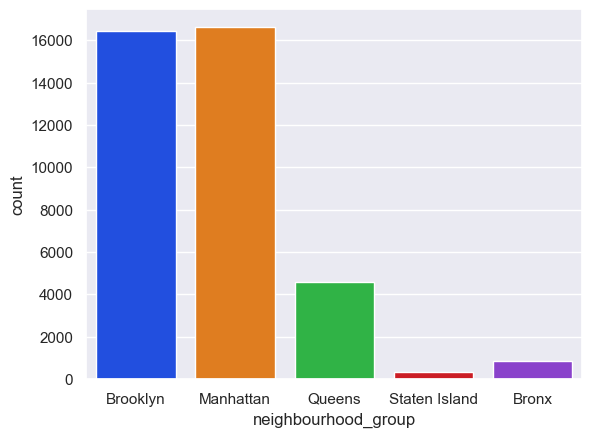

In [21]:
#categorical analysis
#count plot
sns.set(style="darkgrid",palette="bright",color_codes=True)
sns.countplot(data = df,x = "neighbourhood_group")

<AxesSubplot:xlabel='room_type', ylabel='count'>

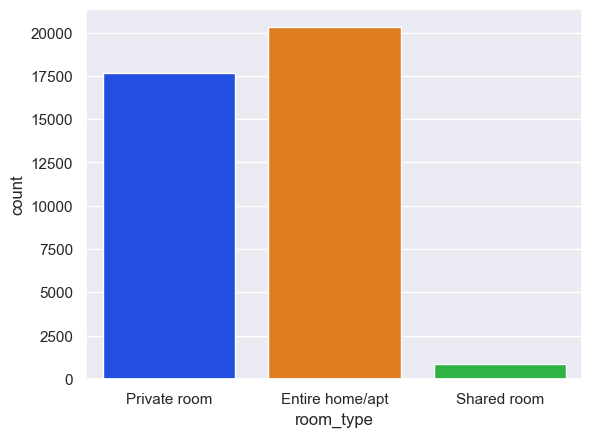

In [22]:
sns.countplot(data = df,x = "room_type")

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

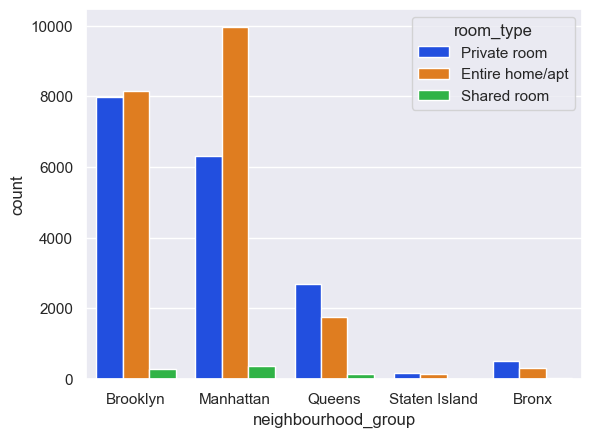

In [23]:
#countplot for room_type and neighbourhood_group columns
sns.countplot(data=df,x = "neighbourhood_group",hue="room_type")

<strong>Pie Chart</strong>:

<AxesSubplot:ylabel='room_type'>

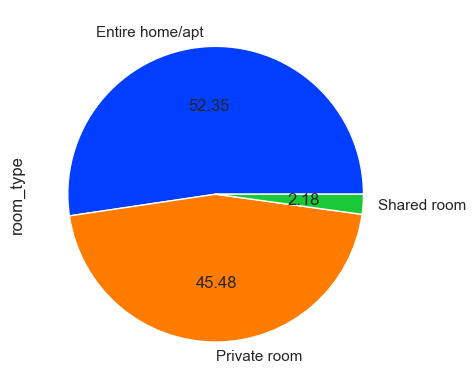

In [24]:
df["room_type"].value_counts().plot(kind="pie",autopct = "%.2f")

<AxesSubplot:ylabel='neighbourhood_group'>

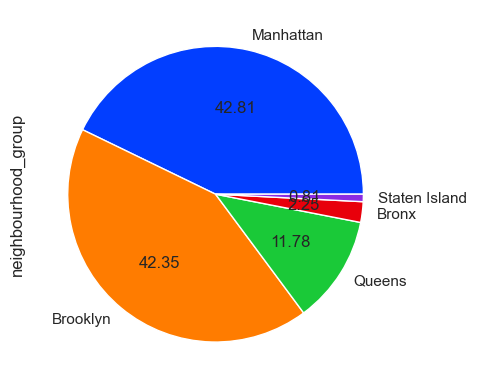

In [25]:
df['neighbourhood_group'].value_counts().plot(kind="pie",autopct="%.2f")

<strong>Titanic Dataset</strong>

In [26]:
df1 = sns.load_dataset("titanic")
df1.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


<AxesSubplot:xlabel='survived', ylabel='count'>

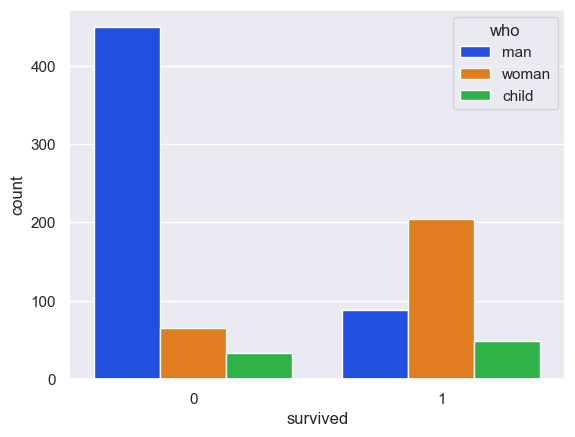

In [27]:
# count plot for survived columns
columns = ['class', 'who']  # Corrected column names
sns.countplot(data=df1, x="survived", hue=columns[1])  # Select the first column from the list


<AxesSubplot:xlabel='survived', ylabel='count'>

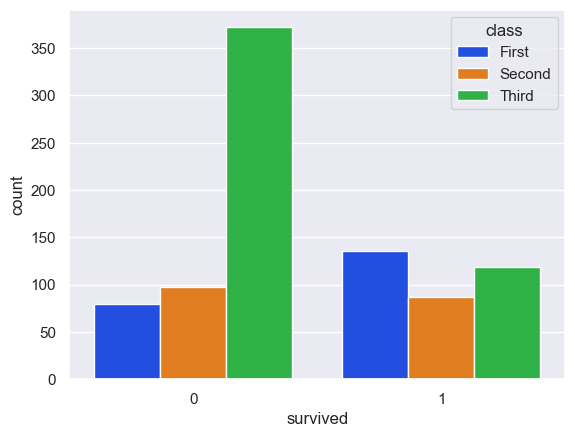

In [28]:
sns.countplot(data = df1,x="survived",hue="class")

<AxesSubplot:ylabel='class'>

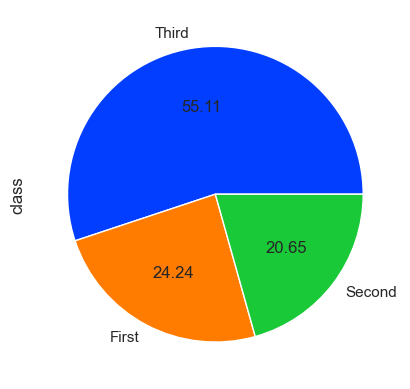

In [29]:
df1['class'].value_counts().plot(kind="pie",autopct="%.2f")

In [30]:
# import altair as alt
# import pandas as pd

# # First, we need to transform the data into a suitable format for Altair
# data = df["room_type"].value_counts().reset_index()
# data.columns = ['room_type', 'count']

# # Now we can create the pie chart
# alt.Chart(data).mark_arc(innerRadius=50).encode(
#     theta='count:Q',
#     color='room_type:N',
#     tooltip=['room_type:N', 'count:Q']
# ).properties(
#     width=400,
#     height=400
# ).interactive()

In [31]:
# import altair as alt
# import pandas as pd

# # First, we need to transform the data into a suitable format for Altair
# data = df["room_type"].value_counts().reset_index()
# data.columns = ['room_type', 'count']

# # Now we can create the bar plot
# alt.Chart(data).mark_bar().encode(
#     x='room_type:N',
#     y='count:Q',
#     tooltip=['room_type:N', 'count:Q']
# ).properties(
#     width=400,
#     height=400
# ).interactive()

<center><strong>Univariate analysis on numercial data</strong></center>

In [32]:
df2 = df.copy()
df2.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


<strong>Histogram</strong>: <small>A histogram is a graphical representation that organizes a group of data points into a specified range</small>

<AxesSubplot:xlabel='price', ylabel='Count'>

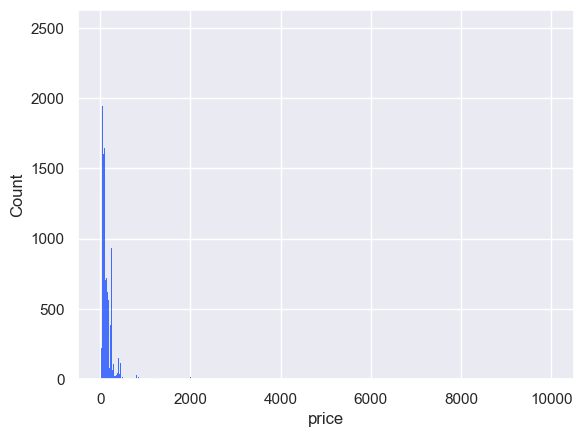

In [33]:
sns.histplot(data = df2,x = "price")

<AxesSubplot:xlabel='price', ylabel='Count'>

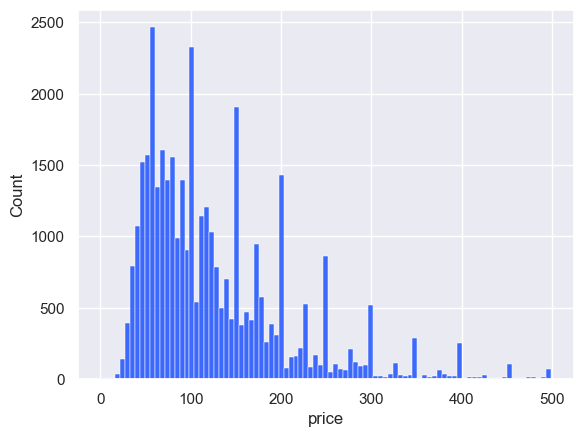

In [34]:
sns.histplot(data = df[df['price']<500],x = 'price')

<AxesSubplot:xlabel='availability_365', ylabel='Count'>

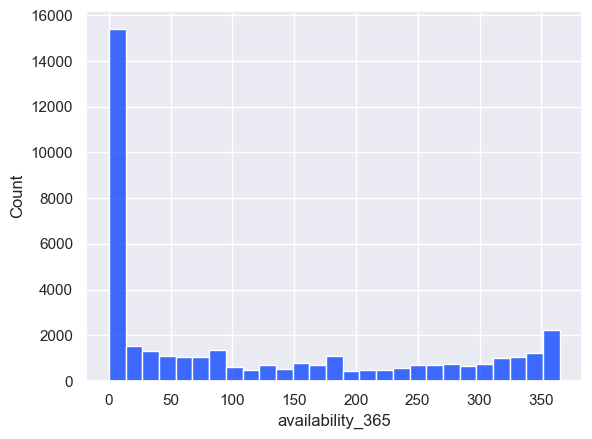

In [35]:
sns.histplot(data = df2,x='availability_365')

<strong>Distribution</strong>: <small>A distribution in statistics is a function that shows the possible values for a variable and how often they occur</small>

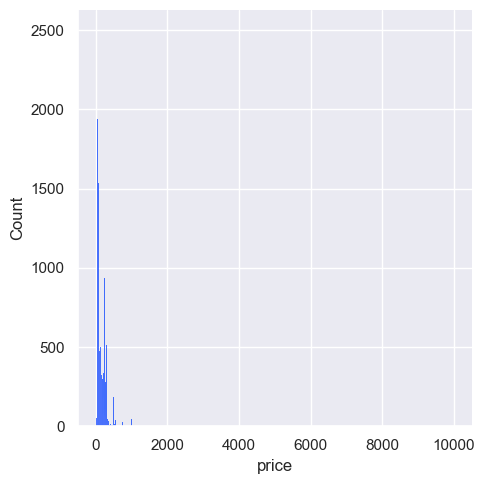

In [36]:
sns.displot(df2['price'])

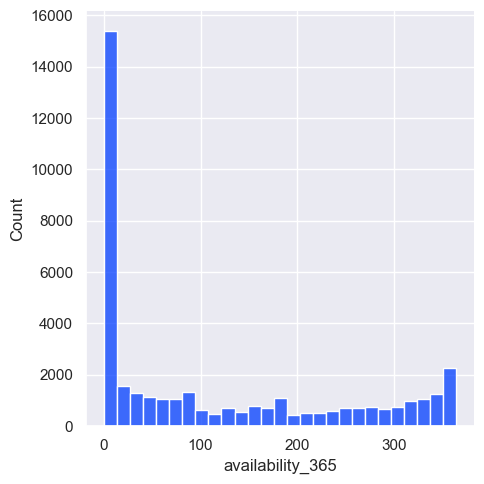

In [37]:
sns.displot(df2["availability_365"])

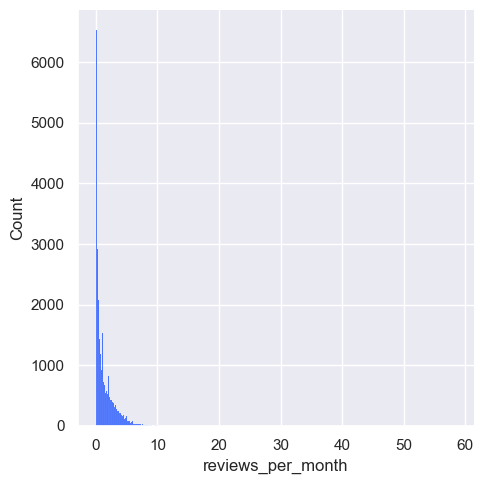

In [38]:

sns.displot(df2['reviews_per_month'])

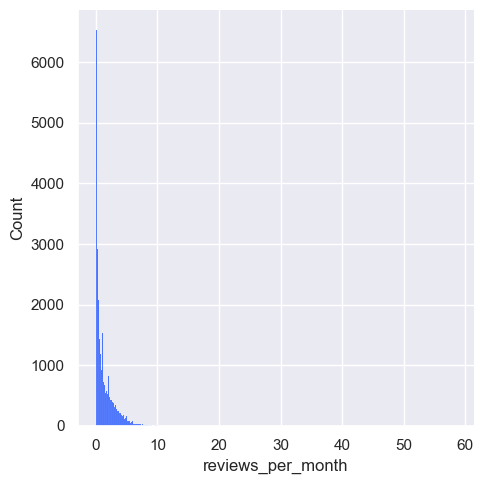

In [39]:
#plot distribution graphs for review_per_month
sns.displot(df2['reviews_per_month'],kde=False)


<strong>box-plot</strong>: <small>box plot is a method for graphically depicting groups of numerical data through their quartiles</small>

<AxesSubplot:>

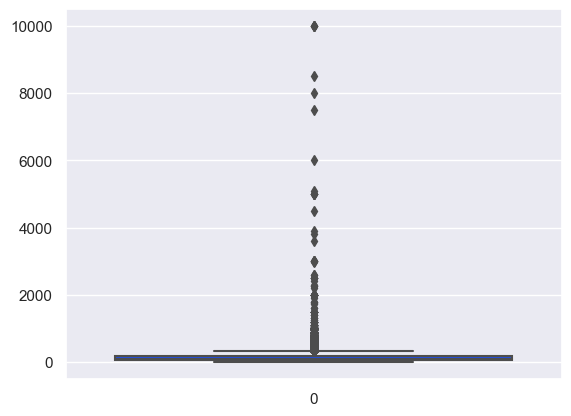

In [40]:
sns.boxplot(df2["price"])

<AxesSubplot:>

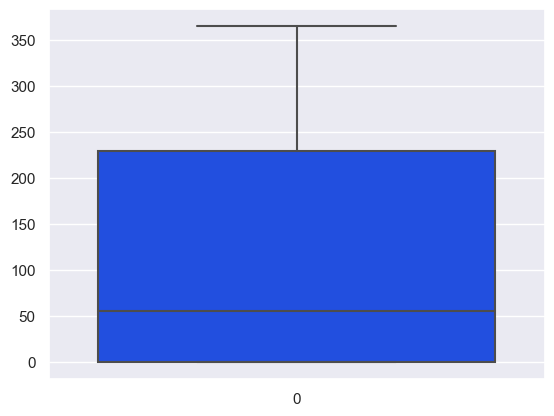

In [41]:
sns.boxplot(df2["availability_365"])

In [42]:
df1.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


<AxesSubplot:xlabel='fare', ylabel='Count'>

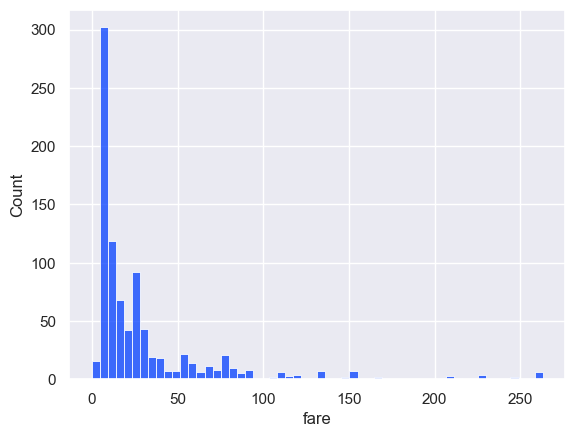

In [44]:
sns.histplot(data = df1[df1['fare']<=300],x = "fare")

C:\Users\home\AppData\Local\Temp\ipykernel_17040\1515258270.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df1['fare'])


<AxesSubplot:ylabel='Density'>

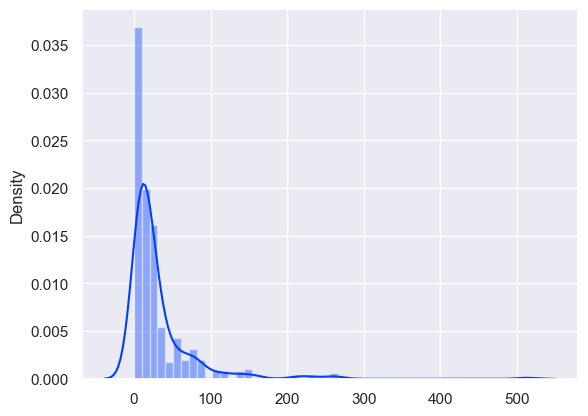

In [46]:
sns.distplot(x=df1['fare'])


<AxesSubplot:>

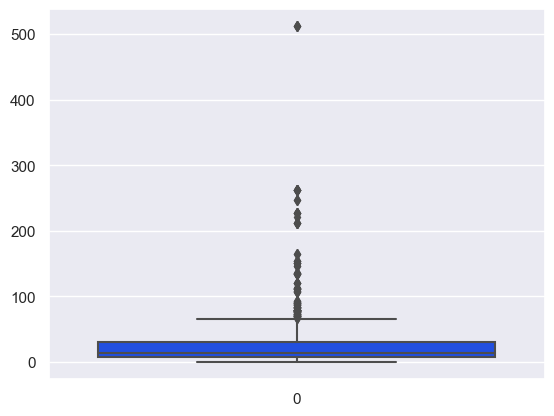

In [47]:
sns.boxplot(df1['fare'])

<AxesSubplot:>

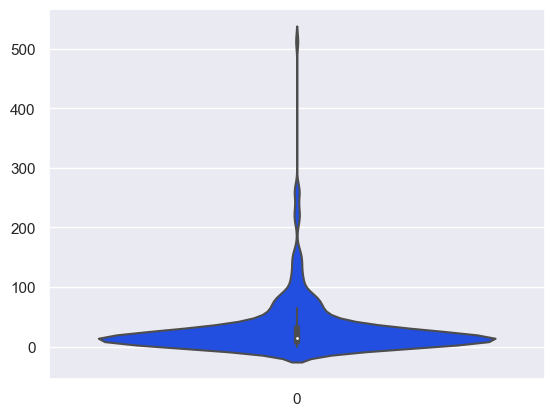

In [51]:
sns.violinplot(df1['fare'])

<AxesSubplot:xlabel='who', ylabel='count'>

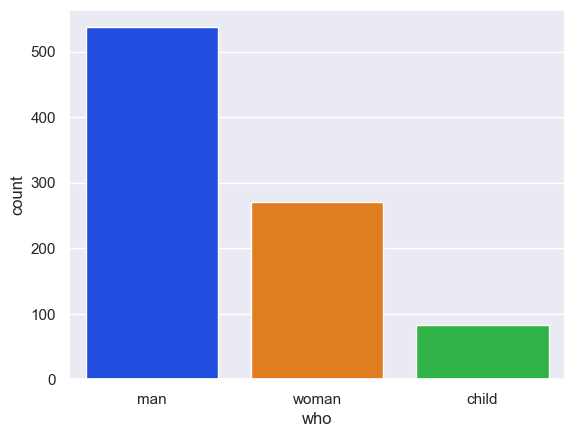

In [49]:
sns.countplot(data = df1,x = "who")